<a href="https://colab.research.google.com/github/avichhitwal/Cat-Detector/blob/main/Cat_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


dataset in drive then copied path

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


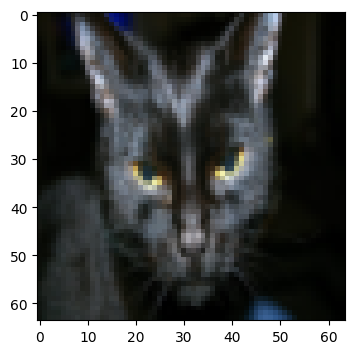

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [ ]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [ ]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


12,288
  equals 64×64×3
 which is the size of one reshaped image vector.

**4 - Two-layer neural network**


Question: Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: LINEAR -> RELU -> LINEAR -> SIGMOID. The functions you may need and their inputs are:

def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters

In [ ]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i  in range(0, num_iterations) :
      A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
      A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

      cost = compute_cost(A2,Y)

      dA2 = - (np.divide(Y,A2) - np.divide(1-Y, 1-A2))
      dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
      dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

      grads = {"dW1" : dW1,
               "db1" : db1,
               "dW2" : dW2,
               "db2" : db2}

      parameters = update_parameters(parameters, grads, learning_rate)
      W1 = parameters["W1"]
      b1 = parameters["b1"]
      W2 = parameters["W2"]
      b2 = parameters["b2"]

      if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
      if print_cost and i % 100 == 0:
            costs.append(cost)

       # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6946561419793272
Cost after iteration 100: 0.6483440427302326
Cost after iteration 200: 0.637238682611179
Cost after iteration 300: 0.6127574071393607
Cost after iteration 400: 0.5732285198708037
Cost after iteration 500: 0.532703028987289
Cost after iteration 600: 0.4921749001052533
Cost after iteration 700: 0.43960463880605916
Cost after iteration 800: 0.384124482298244
Cost after iteration 900: 0.35929250532189183
Cost after iteration 1000: 0.32264978721321186
Cost after iteration 1100: 0.31630039287286227
Cost after iteration 1200: 0.29521769259133995
Cost after iteration 1300: 0.19944784454946474
Cost after iteration 1400: 0.16436335990080486
Cost after iteration 1500: 0.14176032673484648
Cost after iteration 1600: 0.12484515931632449
Cost after iteration 1700: 0.10492898950925758
Cost after iteration 1800: 0.08961083640759261
Cost after iteration 1900: 0.07205607032354239
Cost after iteration 2000: 0.06240661830222431
Cost after iteration 2100: 0.0548925

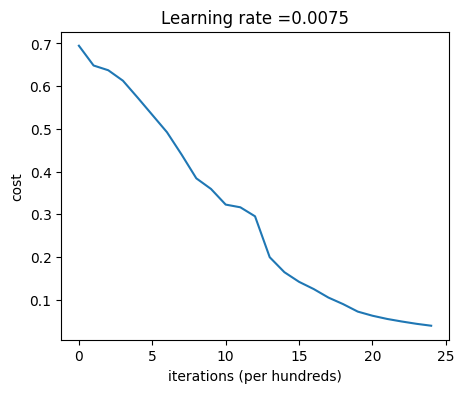

In [ ]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [ ]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.6799999999999999


**5 - L-layer Neural Network**


Question: Use the helper functions you have implemented previously to build an L
-layer neural network with the following structure: [LINEAR -> RELU]×
(L-1) -> LINEAR -> SIGMOID. The functions you may need and their inputs are:


def initialize_parameters_deep(layers_dims):
    ...
    return parameters


def L_model_forward(X, parameters):
    ...
    return AL, caches


def compute_cost(AL, Y):
    ...
    return cost


def L_model_backward(AL, Y, caches):
    ...
    return grads

    
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters

In [ ]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [ ]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []
    grads = {}

    parameters = initialize_parameters_deep(layer_dims)

    for i in range(num_iterations):

      AL, caches = L_model_forward(X, parameters)

      cost = compute_cost(AL, Y)

      grads = L_model_backward(AL, Y, caches)

      parameters = update_parameters(parameters, grads, learning_rate)

      if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
      if print_cost and i % 100 == 0:
            costs.append(cost)

       # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6923799160908503
Cost after iteration 100: 0.6461586699206974
Cost after iteration 200: 0.6317752454522949
Cost after iteration 300: 0.6000906114062465
Cost after iteration 400: 0.5594266141002634
Cost after iteration 500: 0.5129882975097562
Cost after iteration 600: 0.45481460420723835
Cost after iteration 700: 0.3993880492055353
Cost after iteration 800: 0.42051546995772565
Cost after iteration 900: 0.3691844132011299
Cost after iteration 1000: 0.3623927556792379
Cost after iteration 1100: 0.3413659079571164
Cost after iteration 1200: 0.33334403193372736
Cost after iteration 1300: 0.26379708597074125
Cost after iteration 1400: 0.16480532038932785
Cost after iteration 1500: 0.14360822941781878
Cost after iteration 1600: 0.12446701193149179
Cost after iteration 1700: 0.7067523839110007
Cost after iteration 1800: 0.09239377122581141
Cost after iteration 1900: 0.07857238240203038
Cost after iteration 2000: 0.06809230848758138
Cost after iteration 2100: 0.0596490

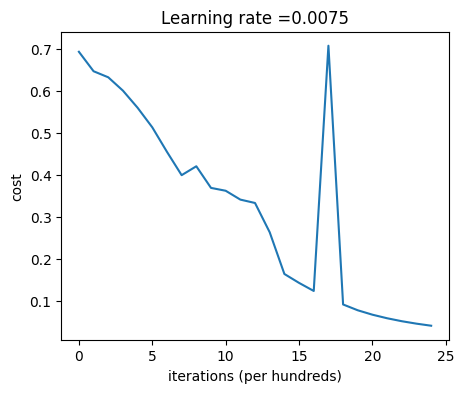

In [ ]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


**6) Results Analysis**


First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images.

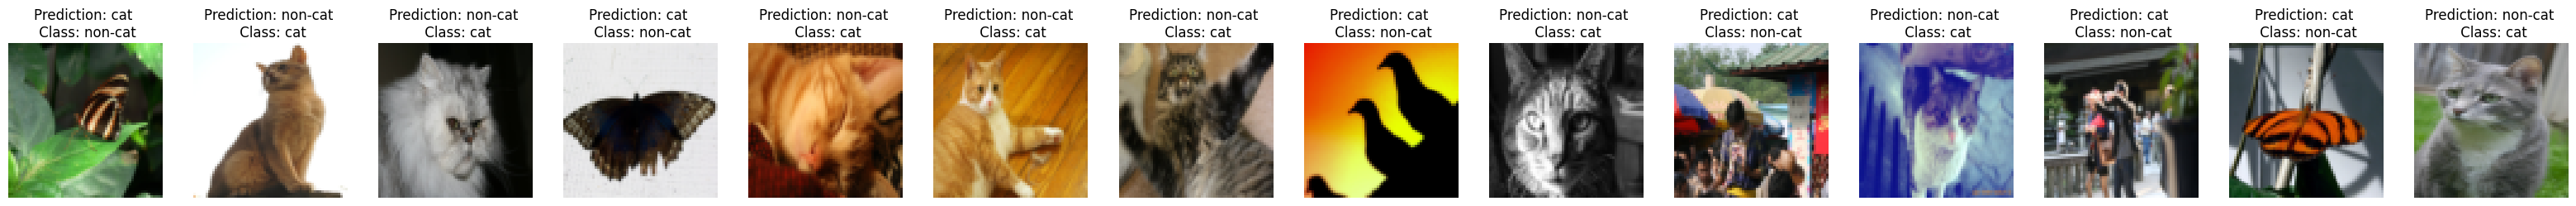

In [ ]:
 print_mislabeled_images(classes, test_x, test_y, pred_test)